In [2]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as  pd
from matplotlib.patches import Rectangle
import os 

In [3]:
# loading climatologies

prism = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_PRISM.nc')
worldclim = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_WorldClim_coarse_focal.nc')
daymet = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_Daymet_coarse_focal.nc')
coast = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/coast.nc')
dem = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/DEM.nc')
lat = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lat.nc')
lon = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lon.nc')


In [4]:
prism_coarse = xr.open_mfdataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/prec_03_PRISM_coarse.nc')

In [4]:
# cropping to BC prism 

worldclim = worldclim.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
daymet = daymet.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
prism = prism.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
prism_coarse = prism_coarse.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
dem = dem.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
lat = lat.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
lon = lon.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))
coast = coast.sel(longitude=slice(-140.795, -114), latitude=slice(60.5, 47.8))

In [5]:
# selecting slice of upper BC for testing data
min_lon = -128
max_lon = -119
min_lat = 56
max_lat = 61
prism_test = prism.where((prism.latitude <= max_lat) & (prism.latitude >= min_lat) & (prism.longitude >= min_lon) & (prism.longitude <= max_lon), drop=True)
worldclim_test = worldclim.where((worldclim.latitude <= max_lat) & (worldclim.latitude >= min_lat) & (worldclim.longitude >= min_lon) & (worldclim.longitude <= max_lon), drop=True)
daymet_test = daymet.where((daymet.latitude <= max_lat) & (daymet.latitude >= min_lat) & (daymet.longitude >= min_lon) & (daymet.longitude <= max_lon), drop=True)

coast_test = coast.where((coast.latitude <= max_lat) & (coast.latitude >= min_lat) & (coast.longitude >= min_lon) & (coast.longitude <= max_lon), drop=True)
dem_test = dem.where((dem.latitude <= max_lat) & (dem.latitude >= min_lat) & (dem.longitude >= min_lon) & (dem.longitude <= max_lon), drop=True)
lat_test = lat.where((lat.latitude <= max_lat) & (lat.latitude >= min_lat) & (lat.longitude >= min_lon) & (lat.longitude <= max_lon), drop=True)
lon_test = lon.where((lon.latitude <= max_lat) & (lon.latitude >= min_lat) & (lon.longitude >= min_lon) & (lon.longitude <= max_lon), drop=True)

In [6]:
# replacing cropped values with NaN
prism['prec'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
worldclim['prec'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
daymet['prec'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

coast['dist'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
dem['dem'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lat['lat'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan
lon['lon'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.nan

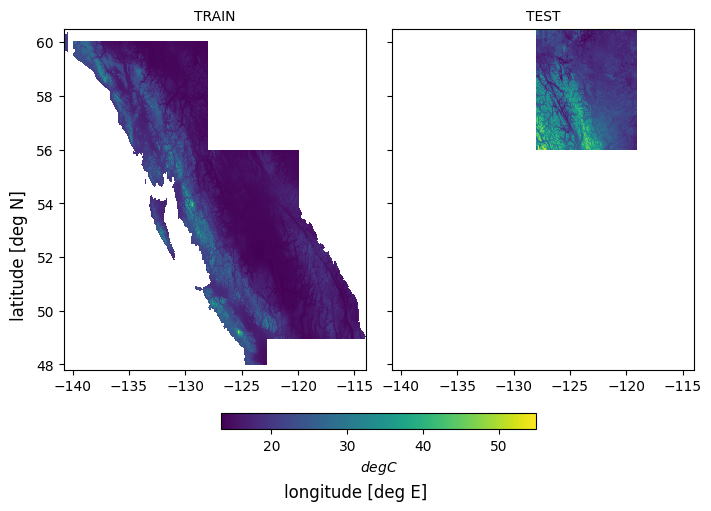

In [7]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.prec, cmap='viridis', label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(worldclim_test.longitude, worldclim_test.latitude, worldclim_test.prec, cmap='viridis', label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

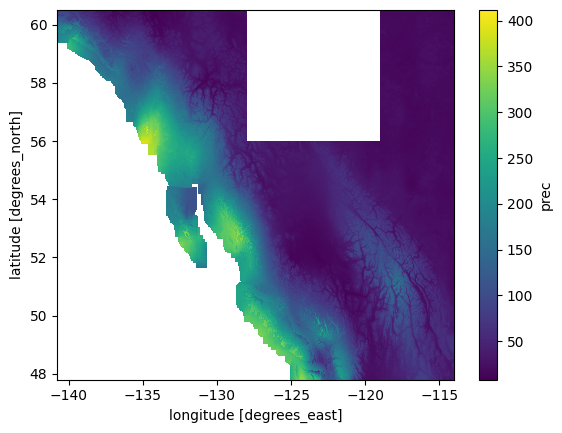

In [8]:
worldclim.prec.plot(cmap='viridis')

In [9]:
worldclim_tens = torch.from_numpy(np.array(worldclim.prec))
daymet_tens = torch.from_numpy(np.array(daymet.prec))
prism_tens = torch.from_numpy(np.array(prism.prec))
prism_coarse_tens = torch.from_numpy(np.array(prism_coarse.prec))
dem_tens = torch.from_numpy(np.array(dem.dem))
lat_tens = torch.from_numpy(np.array(lat.lat))
lon_tens = torch.from_numpy(np.array(lon.lon))
coast_tens = torch.from_numpy(np.array(coast.dist))

In [10]:
worldclim_tens = worldclim_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
daymet_tens = daymet_tens.where(np.isnan(prism_coarse_tens)==False, np.nan)
dem_tens = dem_tens.where(np.isnan(prism_tens)==False, np.nan)
lat_tens = lat_tens.where(np.isnan(prism_tens)==False, np.nan)
lon_tens = lon_tens.where(np.isnan(prism_tens)==False, np.nan)
coast_tens = coast_tens.where(np.isnan(prism_tens)==False, np.nan)

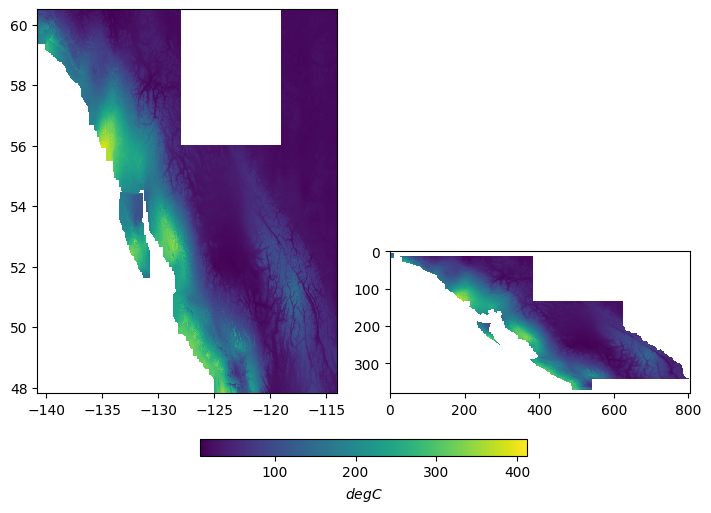

In [11]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5))

pc1 = ax[0].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.prec, cmap='viridis', label=r'$m$')
pc2 = ax[1].imshow(worldclim_tens, cmap='viridis', label=r'$m$')


fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [12]:
prism_prec = prism['prec']
worldclim_prec = worldclim['prec']
daymet_prec = daymet['prec']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [13]:
prism_mean = np.nanmean(prism_tens)
worldclim_mean = np.nanmean(worldclim_tens)
daymet_mean = np.nanmean(daymet_tens)
coast_mean = np.nanmean(coast_tens)
dem_mean = np.nanmean(dem_tens)
lat_mean = np.nanmean(lat_tens)
lon_mean = np.nanmean(lon_tens)

In [14]:
# calculating standard deviation 

prism_std = np.nanstd(prism_tens)
worldclim_std = np.nanstd(worldclim_tens)
daymet_std = np.nanstd(daymet_tens)
coast_std = np.nanstd(coast_tens)
dem_std = np.nanstd(dem_tens)
lat_std = np.nanstd(lat_tens)
lon_std = np.nanstd(lon_tens)

In [15]:
prism_std


110.630066

In [16]:
import csv 
# standardization is done based on mean and standard deviation of training data
# testing data is normalized using that mean and std
# data rows as dictionary objects 
mydict =[{'var': 'prec','clim': 'prism', 'mean': prism_mean, 'std':prism_std}, 
         {'var': 'prec', 'clim': 'worldclim', 'mean': worldclim_mean, 'std':worldclim_std},
         {'var': 'prec', 'clim': 'daymet', 'mean': daymet_mean, 'std':daymet_std},  
         {'var': 'dist from coast', 'clim': 'prism', 'mean':coast_mean, 'std':coast_std},
         {'var': 'dem', 'clim': 'prism', 'mean':dem_mean, 'std':dem_std},
         {'var': 'lat', 'clim': 'prism', 'mean':lat_mean, 'std':lat_std},
         {'var': 'lon', 'clim': 'prism', 'mean':lon_mean, 'std':lon_std},
         ]

# field names 
fields = ['var', 'clim', 'mean', 'std'] 

with open('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/standardization.csv', 'w', newline='') as file: 
    writer = csv.DictWriter(file, fieldnames = fields)

    writer.writeheader() 

    writer.writerows(mydict)

In [17]:
# standardizing all variables 
prism['prec'] = (prism_prec - prism_mean)/prism_std
worldclim['prec'] = (worldclim_prec - worldclim_mean)/worldclim_std
daymet['prec'] = (daymet_prec - daymet_mean)/daymet_std
coast['dist'] = (coast_dist - coast_mean)/coast_std
dem['dem'] = (dem_dem - dem_mean)/dem_std
lat['lat'] = (lat_lat - lat_mean)/lat_std
lon['lon'] = (lon_lon - lon_mean)/lon_std

In [18]:
# standardizing test variables 
prism_prec = prism_test['prec']
worldclim_prec = worldclim_test['prec']
daymet_prec = daymet_test['prec']
coast_dist = coast_test['dist']
dem_dem = dem_test['dem']
lat_lat = lat_test['lat']
lon_lon = lon_test['lon']

prism_test['prec'] = (prism_prec - prism_mean)/prism_std
worldclim_test['prec'] = (worldclim_prec - worldclim_mean)/worldclim_std
daymet_test['prec'] = (daymet_prec - daymet_mean)/daymet_std
coast_test['dist'] = (coast_dist - coast_mean)/coast_std
dem_test['dem'] = (dem_dem - dem_mean)/dem_std
lat_test['lat'] = (lat_lat - lat_mean)/lat_std
lon_test['lon'] = (lon_lon - lon_mean)/lon_std

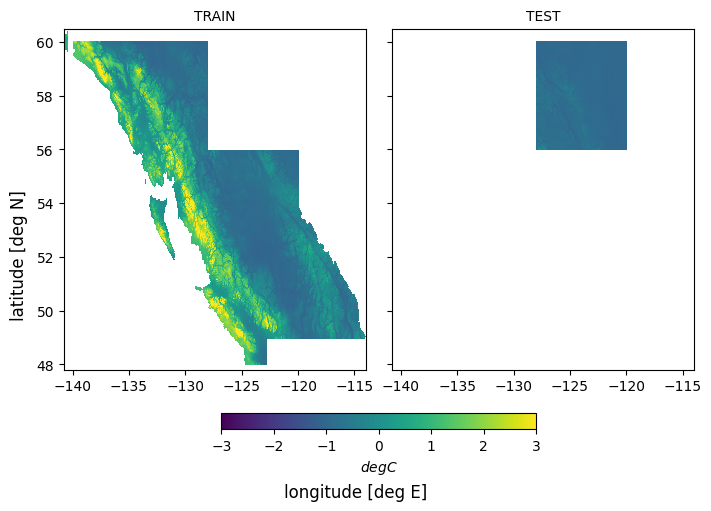

In [19]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.prec, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(prism_test.longitude, prism_test.latitude, prism_test.prec, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [20]:
prism.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_train.nc')
worldclim.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_train.nc')
daymet.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_train.nc')
dem.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/dem_train.nc')
lat.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/lat_train.nc')
lon.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/lon_train.nc')
coast.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/coast_train.nc')

In [21]:
prism_test.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_test.nc')
worldclim_test.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_test.nc')
dem_test.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/dem_test.nc')
lat_test.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/lat_test.nc')
lon_test.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/lon_test.nc')
coast_test.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/coast_test.nc')

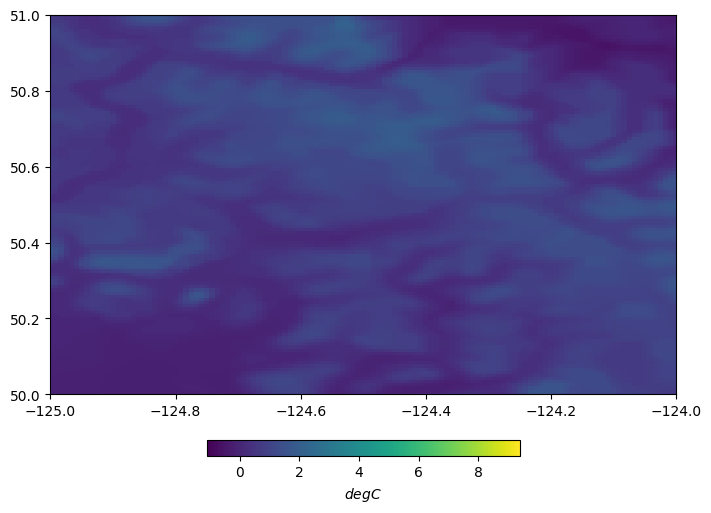

In [22]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_train.nc')

fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(x.longitude, x.latitude, x.prec, cmap='viridis', label=r'$m$')

ax.set_ylim(50,51)
ax.set_xlim(-125,-124)

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', label=r'$deg C$')

In [23]:
prism_pt = np.array(prism.prec)
worldclim_pt = np.array(worldclim.prec)
daymet_pt = np.array(daymet.prec)
coast_pt = np.array(coast.dist)
dem_pt = np.array(dem.dem)
lat_pt = np.array(lat.lat)
lon_pt = np.array(lon.lon)

In [24]:
prism_test_pt = np.array(prism_test.prec)
worldclim_test_pt = np.array(worldclim_test.prec)
daymet_test_pt = np.array(daymet_test.prec)
coast_test_pt = np.array(coast_test.dist)
dem_test_pt = np.array(dem_test.dem)
lat_test_pt = np.array(lat_test.lat)
lon_test_pt = np.array(lon_test.lon)

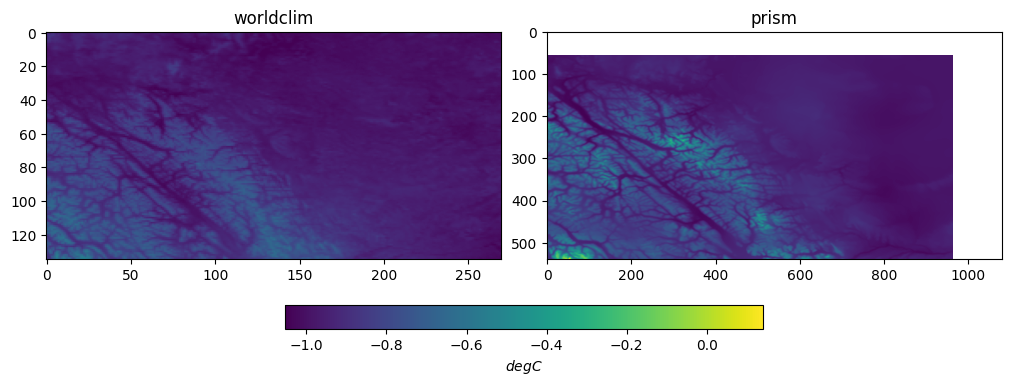

In [25]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

min = np.nanmin(prism_test_pt)
max = np.nanmax(prism_test_pt)

pc1 = ax[0].imshow(worldclim_test_pt, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[0].set_title('worldclim')

pc2 = ax[1].imshow(prism_test_pt, vmin=min, vmax=max, cmap='viridis', label=r'$m$')
ax[1].set_title('prism')

fig.colorbar(pc1, shrink=0.5, aspect=20, ax=ax[0:2], location='bottom', label=r'$deg C$')

In [26]:
x_fine = np.arange(0,prism_pt.shape[0]-128, 8)
y_fine = np.arange(0,prism_pt.shape[1]-128, 8)

x_coarse = np.arange(0,worldclim_pt.shape[0]-32, 2)
y_coarse = np.arange(0,worldclim_pt.shape[1]-32, 2)

In [27]:
x_fine_test= np.arange(0,prism_test_pt.shape[0]-128, 8)
y_fine_test = np.arange(0,prism_test_pt.shape[1]-128, 8)

x_coarse_test = np.arange(0,worldclim_test_pt.shape[0]-32, 2)
y_coarse_test = np.arange(0,worldclim_test_pt.shape[1]-32, 2)

In [28]:
tiles_fine_prism = []
tiles_fine_coast = []
tiles_fine_dem = []
tiles_fine_lat = []
tiles_fine_lon = []
for i in range(0, len(y_fine)):
    prism = prism_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism.append(prism[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon.append(lon[0+x_fine[j]:128+x_fine[j]])

In [31]:
prism_pt.shape

(1524, 3216)

In [35]:
tiles_fine_prism_test = []
tiles_fine_coast_test = []
tiles_fine_dem_test = []
tiles_fine_lat_test = []
tiles_fine_lon_test = []
for i in range(0, len(y_fine_test)):
    prism = prism_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    coast = coast_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    dem = dem_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lat = lat_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lon = lon_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_fine_prism_test.append(prism[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_coast_test.append(coast[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_dem_test.append(dem[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lat_test.append(lat[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lon_test.append(lon[0+x_fine_test[j]:128+x_fine_test[j]])

In [36]:
len(tiles_fine_prism)

67550

In [37]:
tiles_coarse_worldclim = []
tiles_coarse_daymet = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    daymet = daymet_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])
        tiles_coarse_daymet.append(daymet[0+x_coarse[j]:32+x_coarse[j]])

In [38]:
tiles_coarse_worldclim_test = []
tiles_coarse_daymet_test = []
for i in range(0, len(y_coarse_test)):
    worldclim = worldclim_test_pt[:,0+y_coarse_test[i]:32+y_coarse_test[i]]
    daymet = daymet_test_pt[:,0+y_coarse_test[i]:32+y_coarse_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_coarse_worldclim_test.append(worldclim[0+x_coarse_test[j]:32+x_coarse_test[j]])
        tiles_coarse_daymet_test.append(daymet[0+x_coarse_test[j]:32+x_coarse_test[j]])

In [39]:
# create for all covariates 
# worldclim and HR 
# calculate which tiles have NAN values based on PRISM grid and then do the same to the other ones  
# throw out ones with all nan 
# if more than 3/4 is good -> fill in nan with average values 


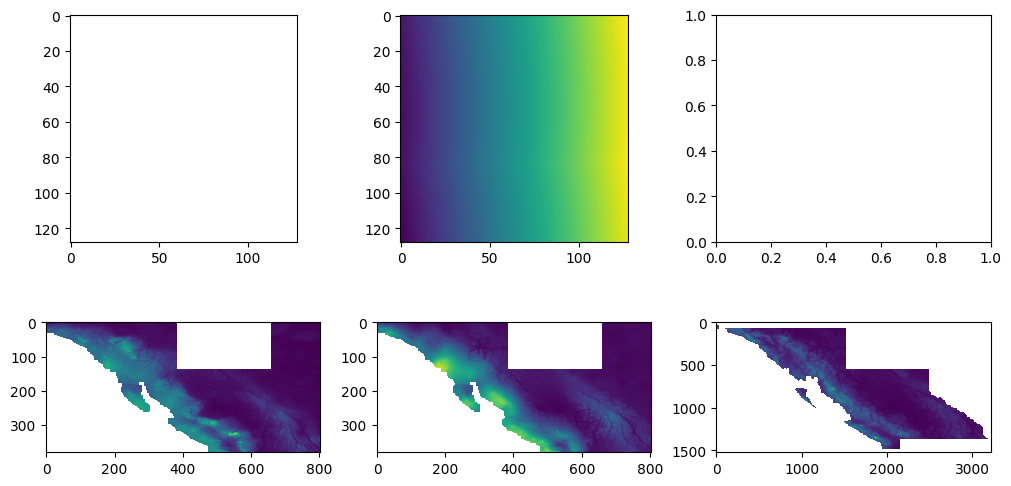

In [42]:
i = -1
fig, ax = plt.subplots(2, 3, layout='constrained', figsize=(10, 5))

pc1 = ax[0,0].imshow(tiles_fine_prism[i])

pc1 = ax[0,1].imshow(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
pc3 = ax[1,2].imshow(prism_pt)
pc4 = ax[1,0].imshow(daymet_pt)
pc4 = ax[1,1].imshow(worldclim_pt)

In [43]:
size_fine = 128*128
size_coarse = 32*32

good_tiles_prism = []
good_tiles_dem = []
good_tiles_coast = []
good_tiles_lat = []
good_tiles_lon = []

good_tiles_worldclim = []
good_tiles_daymet = []

for i in range(0, len(tiles_fine_prism)):
    ind = np.argwhere(np.isnan(tiles_fine_prism[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism.append(tiles_fine_prism[i])
        good_tiles_dem.append(tiles_fine_dem[i])
        good_tiles_coast.append(tiles_fine_coast[i])
        good_tiles_lat.append(tiles_fine_lat[i])
        good_tiles_lon.append(tiles_fine_lon[i])
        
        good_tiles_worldclim.append(tiles_coarse_worldclim[i])
        good_tiles_daymet.append(tiles_coarse_daymet[i])

In [44]:
good_tiles_prism_test = []
good_tiles_dem_test = []
good_tiles_coast_test = []
good_tiles_lat_test = []
good_tiles_lon_test = []

good_tiles_worldclim_test = []
good_tiles_daymet_test = []

for i in range(0, len(tiles_fine_prism_test)):
    ind = np.argwhere(np.isnan(tiles_fine_prism_test[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim_test[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism_test.append(tiles_fine_prism_test[i])
        good_tiles_dem_test.append(tiles_fine_dem_test[i])
        good_tiles_coast_test.append(tiles_fine_coast_test[i])
        good_tiles_lat_test.append(tiles_fine_lat_test[i])
        good_tiles_lon_test.append(tiles_fine_lon_test[i])
        
        good_tiles_worldclim_test.append(tiles_coarse_worldclim_test[i])
        good_tiles_daymet_test.append(tiles_coarse_daymet_test[i])

In [45]:
del tiles_fine_prism 
del tiles_coarse_worldclim
del tiles_coarse_daymet
del tiles_fine_dem
del tiles_fine_coast
del tiles_fine_lat
del tiles_fine_lon

In [46]:
import gc
gc.collect()

29954

In [47]:
del tiles_fine_prism_test
del tiles_coarse_worldclim_test
del tiles_coarse_daymet_test
del tiles_fine_dem_test
del tiles_fine_coast_test
del tiles_fine_lat_test
del tiles_fine_lon_test

In [48]:
gc.collect()

0

In [49]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_prism))]
good_tiles_prism = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_train.pt')

del good_tiles_prism
del tiles_unsq

gc.collect()

0

In [50]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim))]
good_tiles_worldclim = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_daymet))]
good_tiles_daymet = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_worldclim, good_tiles_daymet), dim=1)

torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_train.pt')

del good_tiles_worldclim
del good_tiles_daymet
del tiles_unsq

gc.collect()

8

In [51]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

In [52]:
x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)
x.shape

torch.Size([19135, 4, 128, 128])

In [53]:
torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/HR_covariates_train.pt')

del x 
del good_tiles_dem
del good_tiles_lat
del good_tiles_lon
del good_tiles_coast

gc.collect()

0

In [54]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_prism_test))]
good_tiles_prism_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism_test, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_test.pt')

del good_tiles_prism_test
del tiles_unsq

gc.collect()

0

In [55]:
tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_worldclim_test))]
good_tiles_worldclim_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

tiles_unsq = [x.unsqueeze(0) for x in torch.as_tensor(np.array(good_tiles_daymet_test))]
good_tiles_daymet_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

x = torch.cat((good_tiles_worldclim_test, good_tiles_daymet_test), dim=1)

torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/worldclim_test.pt')

del good_tiles_worldclim_test
del good_tiles_daymet_test
del tiles_unsq

gc.collect()

0

In [56]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem_test))]
good_tiles_dem_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast_test))]
good_tiles_coast_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat_test))]
good_tiles_lat_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon_test))]
good_tiles_lon_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del tiles_unsq

In [57]:
x = torch.cat((good_tiles_dem_test, good_tiles_lat_test, good_tiles_lon_test, good_tiles_coast_test), dim=1)
x.shape

torch.Size([4725, 4, 128, 128])

In [58]:
torch.save(x, 'C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/HR_covariates_test.pt')

del x
del good_tiles_dem_test
del good_tiles_lat_test
del good_tiles_lon_test
del good_tiles_coast_test